In [51]:
import os
os.getcwd()
import pandas as pd
df = pd.read_csv("/Users/josepeon/Documents/ZEROZERO/scanalyzer/data/simplification_logs.csv")

In [52]:
df.head()

,mesh_name,vertices,triangles,surface_area,volume,watertight,average_edge_length,average_triangle_aspect_ratio,min_curvature,average_curvature,max_curvature,connected_components,approx_thickness,simplification_level
0,test1,12400,24800,452.3,87.4,1,0.025,1.25,-0.5,0.10,1.2,1,4.2,Mild
1,test2,5300,10450,198.2,34.8,0,0.031,1.10,-0.3,0.06,0.8,2,3.1,Aggressive
2,test3,6000,11800,210.5,39.1,1,0.028,1.15,-0.4,0.08,1.0,2,3.7,Moderate
3,test4,4800,9400,175.0,30.4,0,0.030,1.12,-0.2,0.07,0.9,2,2.9,Mild
4,test5,11000,22000,390.0,74.5,1,0.026,1.22,-0.6,0.09,1.3,1,4.1,Aggressive


In [53]:
for col in df.columns:
    if col not in ['mesh_name', 'simplification_level']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [54]:
df.describe()

,vertices,triangles,surface_area,volume,watertight,average_edge_length,average_triangle_aspect_ratio,min_curvature,average_curvature,max_curvature,connected_components,approx_thickness
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,7308.500000,14516.250000,266.98800,48.761000,0.560000,0.029540,1.160700,-0.385000,0.077550,1.031600,1.610000,3.328500
std,2239.431404,4562.684394,81.61752,15.811384,0.497633,0.002548,0.061403,0.128286,0.015515,0.187516,0.599749,0.528806
min,3000.000000,5800.000000,115.00000,20.500000,0.000000,0.024000,1.000000,-0.700000,0.040000,0.600000,1.000000,2.200000
25%,5300.000000,10375.000000,185.75000,33.075000,0.000000,0.027000,1.100000,-0.500000,0.060000,0.870000,1.000000,2.900000
50%,7250.000000,14400.000000,270.00000,47.750000,1.000000,0.029000,1.160000,-0.400000,0.080000,0.995000,2.000000,3.350000
75%,9100.000000,18200.000000,336.50000,62.175000,1.000000,0.031250,1.212500,-0.300000,0.090000,1.200000,2.000000,3.800000
max,13000.000000,26000.000000,460.00000,90.000000,1.000000,0.037000,1.300000,-0.100000,0.110000,1.500000,3.000000,4.500000


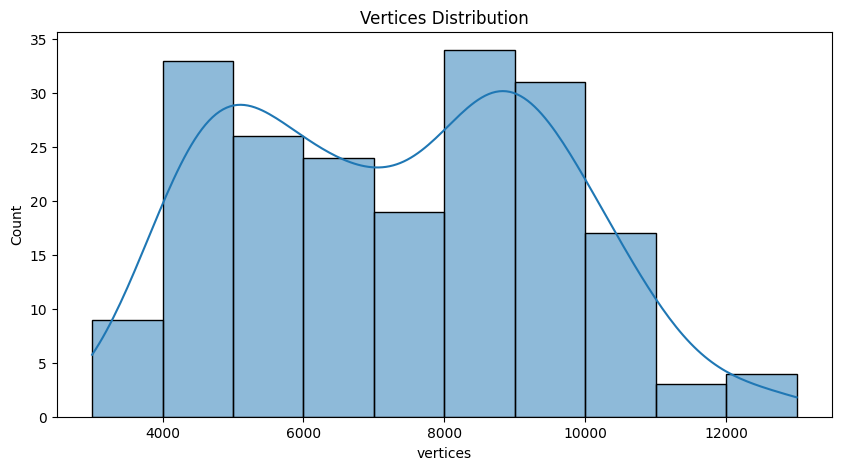

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['vertices'], bins=10, kde=True)
plt.title("Vertices Distribution")
plt.show()

In [56]:
print(df.dtypes)
print(df.select_dtypes(include='number').isna().sum())

mesh_name                         object
vertices                           int64
triangles                          int64
surface_area                     float64
volume                           float64
watertight                         int64
average_edge_length              float64
average_triangle_aspect_ratio    float64
min_curvature                    float64
average_curvature                float64
max_curvature                    float64
connected_components               int64
approx_thickness                 float64
simplification_level              object
dtype: object
vertices                         0
triangles                        0
surface_area                     0
volume                           0
watertight                       0
average_edge_length              0
average_triangle_aspect_ratio    0
min_curvature                    0
average_curvature                0
max_curvature                    0
connected_components             0
approx_thickness           

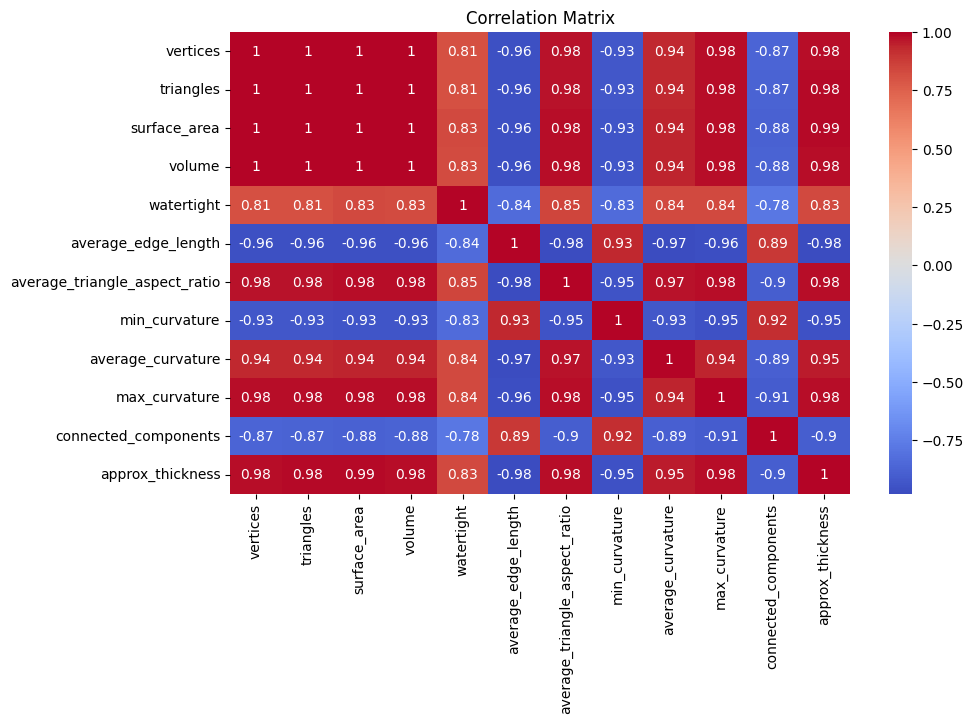

In [57]:
numeric_df = df.select_dtypes(include='number').dropna(axis=1, how='any')  # drop columns with NaN
if not numeric_df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()
else:
    print("No numeric columns available for correlation matrix.")

In [58]:
print(df.dtypes)
print(df.select_dtypes(include='number').isna().sum())

mesh_name                         object
vertices                           int64
triangles                          int64
surface_area                     float64
volume                           float64
watertight                         int64
average_edge_length              float64
average_triangle_aspect_ratio    float64
min_curvature                    float64
average_curvature                float64
max_curvature                    float64
connected_components               int64
approx_thickness                 float64
simplification_level              object
dtype: object
vertices                         0
triangles                        0
surface_area                     0
volume                           0
watertight                       0
average_edge_length              0
average_triangle_aspect_ratio    0
min_curvature                    0
average_curvature                0
max_curvature                    0
connected_components             0
approx_thickness           

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['simplification_level_encoded'] = le.fit_transform(df['simplification_level'])

In [60]:
print(df[['simplification_level', 'simplification_level_encoded']])

    simplification_level  simplification_level_encoded
0                   Mild                             1
1             Aggressive                             0
2               Moderate                             2
3                   Mild                             1
4             Aggressive                             0
..                   ...                           ...
195           Aggressive                             0
196                 Mild                             1
197             Moderate                             2
198           Aggressive                             0
199                 Mild                             1

[200 rows x 2 columns]


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Features and label
X = df.drop(columns=['mesh_name', 'simplification_level', 'simplification_level_encoded'])
y = df['simplification_level_encoded']

# Drop any rows with NaNs
X = X.dropna()
y = y[X.index]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.73      0.65      0.69        17
           1       0.35      0.75      0.48         8
           2       0.62      0.33      0.43        15

    accuracy                           0.55        40
   macro avg       0.57      0.58      0.53        40
weighted avg       0.62      0.55      0.55        40

